In [235]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video
from helpers.collection_of_experiments import CollectionOfExperiments
from helpers.computational_tools import remesh
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [212]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4', additional_subfolder='output') + \
     CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')

In [213]:
#ds.print_exps()

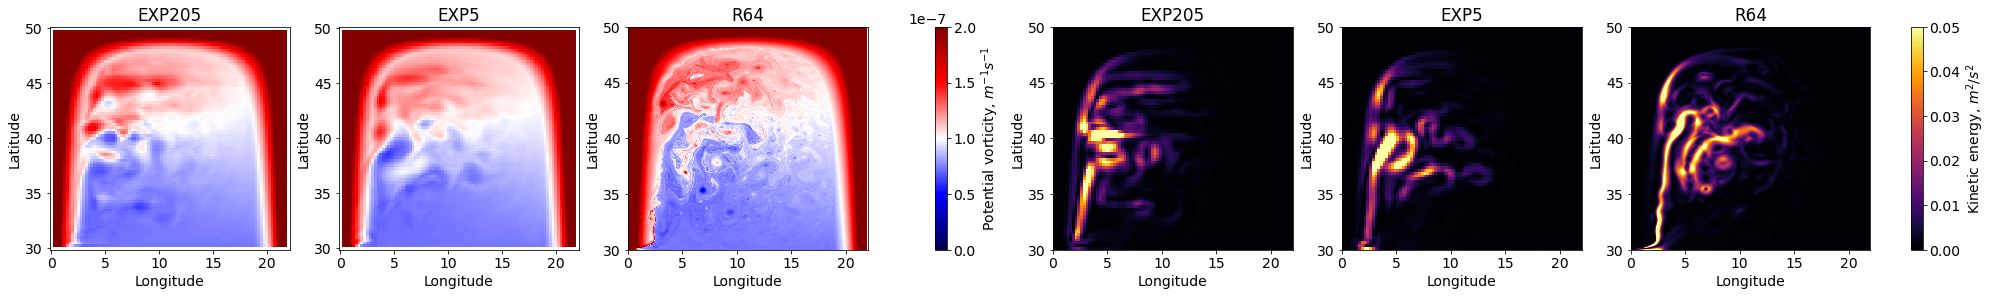

In [214]:
fig, ax = ds.get_axes(nfig=6, ncol=6)
ds.plot_PV(['EXP205', 'EXP5', 'R64'], ax=ax[:3]);
ds.plot_KE(['EXP205', 'EXP5', 'R64'], ax=ax[3:]);

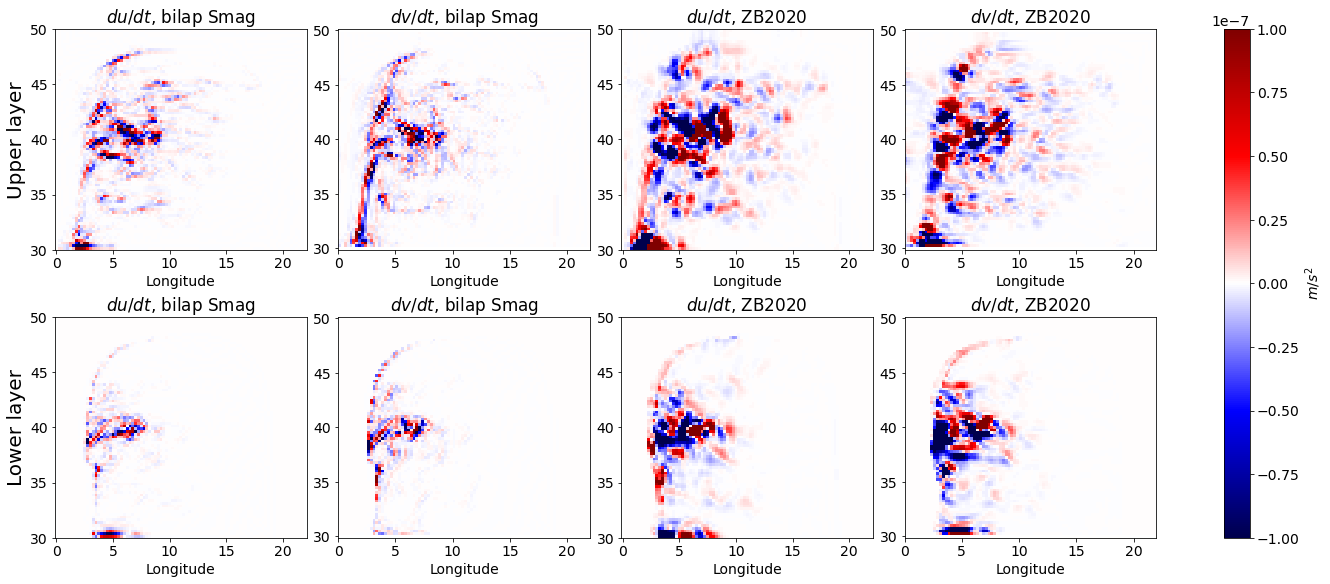

In [207]:
ds.plot_SGS('EXP205');

In [194]:
animate_function = ds.animate(ds.plot_PV, nfig=2, Time=range(-10,0), videoname='PV.mp4')
videoname = animate_function(['R8', 'R32'])

In [157]:
animate_function = ds.animate(ds.pcolormesh, nfig=3, videoname='ssh.mp4')
videoname = animate_function('e', ['R4', 'R16', 'R64'], cmap='seismic')

In [180]:
animate_function = ds.animate(ds.plot_SGS, nfig=8, ncol=4, videoname='SGS.mp4')
videoname = animate_function('EXP205')

# Coarsegraining tools: remesh(input, target)

## Simple coarsegraining

Text(0.5, 1.0, 'Result-Target')

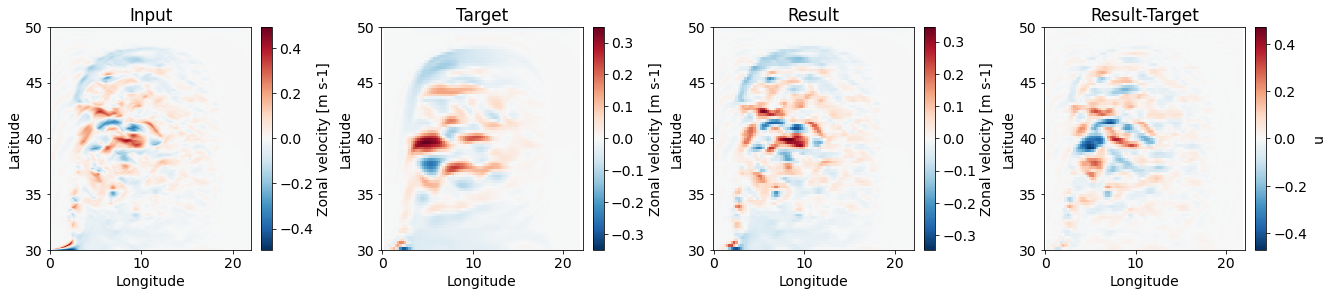

In [286]:
fig, ax = ds.get_axes(nfig=4, ncol=4)
input = ds['R64'].prog.u.isel(Time=-1,zl=0)
target = ds['R4'].prog.u.isel(Time=-1,zl=0)
result = remesh(input,target)
input.plot(ax=ax[0]); ax[0].set_title('Input')
target.plot(ax=ax[1]); ax[1].set_title('Target')
result.plot(ax=ax[2]); ax[2].set_title('Result')
(result-target).plot(ax=ax[3]); ax[3].set_title('Result-Target')

## Simple interpolation to fine mesh

Text(0.5, 1.0, 'Result-Target')

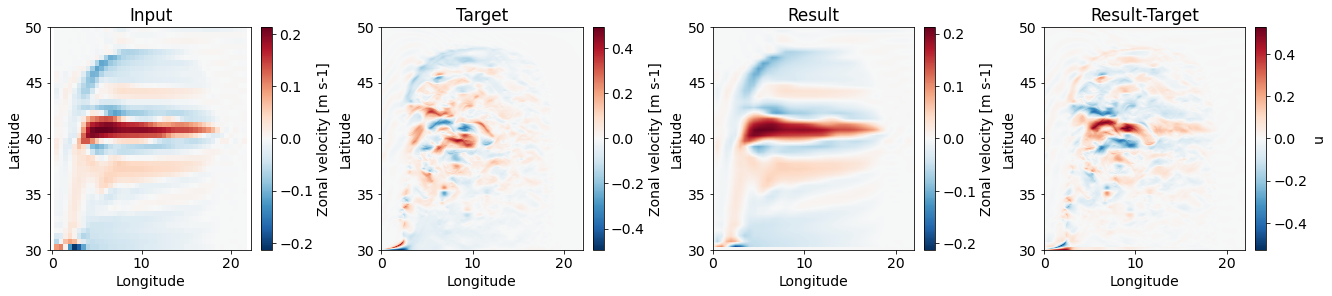

In [283]:
fig, ax = ds.get_axes(nfig=4, ncol=4)
input = ds['R2'].prog.u.isel(Time=-1,zl=0)
target = ds['R64'].prog.u.isel(Time=-1,zl=0)
result = remesh(input,target)
input.plot(ax=ax[0]); ax[0].set_title('Input')
target.plot(ax=ax[1]); ax[1].set_title('Target')
result.plot(ax=ax[2]); ax[2].set_title('Result')
(result-target).plot(ax=ax[3]); ax[3].set_title('Result-Target')

## U-points to V-points interpolation

Text(0.5, 1.0, 'Result-Target')

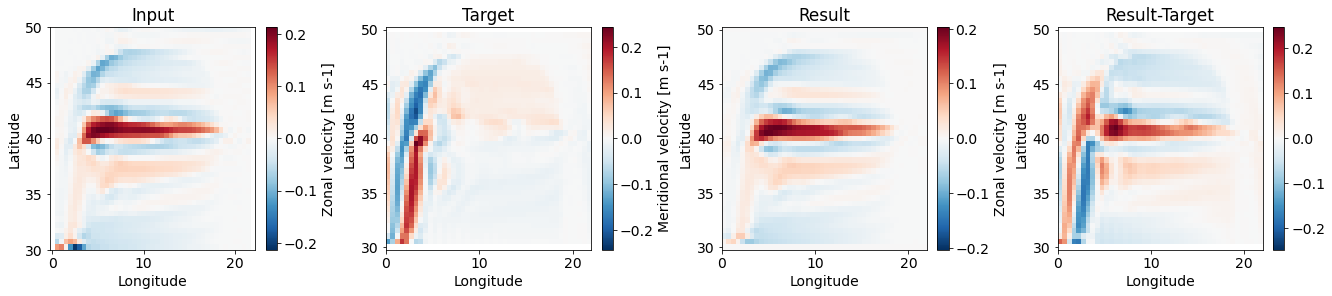

In [290]:
fig, ax = ds.get_axes(nfig=4, ncol=4)
input = ds['R2'].prog.u.isel(Time=-1,zl=0)
target = ds['R2'].prog.v.isel(Time=-1,zl=0)
result = remesh(input,target)
input.plot(ax=ax[0]); ax[0].set_title('Input')
target.plot(ax=ax[1]); ax[1].set_title('Target')
result.plot(ax=ax[2]); ax[2].set_title('Result')
(result-target).plot(ax=ax[3]); ax[3].set_title('Result-Target')